# Title

Muhammad Ikram Qadri

House Price Prediction with Linear Regression

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project implements the linear regression model for house price predictions. We use different sets of independent variables to see their impact on the accuracy of the underlying model. The results show that the muliple linear regression model predicts far better than the simple linear regression model.


[Back to top](#Index)


## 1. Introduction

In this project we are going implement our first Machine Learning model which is linear regression to predict the house prices. For this purpose we are provided with two datasets called `houseSmallData` and `jtest`for trainging and testing the model, respectively. Throughout this project we are going to use the following Python packages:

* `Numpy`: NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* `Pandas`: Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
* `Matplotlib`: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
* `Seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* `Sklearn`: Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

In the [Data](#2.-The-Data) section, we are going to import, export and prepare the data for the linear regression by mostly using the `Numpy` and `Pandas` packages. We also have produced a heatmap and pair plots to visualize the correlation of different variables with the target variable `SalePrice` and with each other as well using `Matplotlib` and `Seaborn` pakages.

In the [Project Description](#3.-Project-Description) section, we breifly formulated the Linear Regrssion. We provided the mathematical equations for simple and multiple linear regression. We trained the model on the `houseSmallData` traing datset and then applied it on the training data. The evulatoin metric we have used to measure the performance of our model is $R^2$. Based on $R^2$ scores we chose the model with best performance and applied it on the test dataset `jtest`.

In the final two sections we conlude the project and provide references, respectively.


[Back to top](#Index)

## 2. The Data

The data we are provided with is in the form of two different csvs.

1. `houseSmallData.csv` contains the training data. It consists on 100 records and 80 features.
2. `jtest.csv` contains the test data. It also is consisting on 100 records and 80 features.


[Back to top](#Index)

### 2.1 Import the Data

Lets load the data from `houseSmallData.csv` into a Pandas dataframe.

In [1]:

# import necessary python packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('houseSmallData.csv', index_col= 0)
df_train.set_index("Id", inplace = True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Lets import the test data as well. We are going to use it in the [model testing](#3.4-Verify-Your-Model-Against-Test-Data) section though. 

In [3]:
df_test = pd.read_csv('jtest.csv', index_col = 0)
df_test.set_index('Id', inplace = True)
df_test. head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


[Back to top](#Index)

### 2.2 Data Exploration

In this section we are going to explore our datasets by using exploratory analysis.

In [4]:

print('df_train dimensions: ', df_train.shape)
print('df_test dimensions: ', df_test.shape)


df_train dimensions:  (100, 80)
df_test dimensions:  (100, 80)


Since we are going to predict the **SalePrice** lets generate is descriptive statistics and visualize how is its distribution looks like.

In [5]:
df_train.SalePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

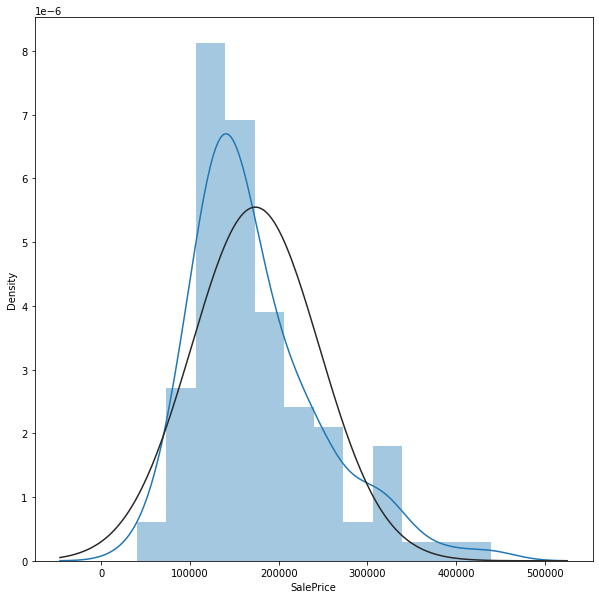

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
sns.distplot(df_train['SalePrice'], fit = norm, ax = ax)

From the figure above it is shown that `SalePrice` has a is skewed Normal distribution. Morevoer, most of the density lies between 100K and 300K.

[Back to top](#Index)

### 2.3 Data Preparation

We are going to apply Linear Regression model to predict the house prices and we know that the linear regression model uses continuous(nemeric) data for predictions. So, the first step for us in the data preparation is to find out if we have non-numeric features in our dataset and if we do lets drop them because we are only concrened with the numeric data. 



In [7]:
print(df_train.dtypes.value_counts())
print(df_test.dtypes.value_counts())

object     42
int64      34
float64     4
dtype: int64
object     43
int64      34
float64     3
dtype: int64


As shown above the underlying training dataset has 42 non-numeric columns while the testing dataset has 43. Below we are going to drop them.

In [8]:
df_train = df_train.select_dtypes(include = np.number)
print('df_train reshaped dimenstions: ', df_train.shape)

df_test = df_test.select_dtypes(include = np.number)
print('df_test reshaped diemensions: ', df_test.shape)

df_train reshaped dimenstions:  (100, 38)
df_test reshaped diemensions:  (100, 37)


We are left with 38 and 37 columns in the training and test datasets. Note that not all of them are going to be used for predictions.

In the next step lets look for the missing values in both of the datasets. 


In [9]:
missing_values_in_the_training_data = df_train.isnull().sum().sort_values(ascending = False) > 0 
missing_values_in_the_training_data = missing_values_in_the_training_data[missing_values_in_the_training_data == True].index

missing_values_in_the_test_data = df_test.isnull().sum().sort_values(ascending = False) > 0
missing_values_in_the_test_data = missing_values_in_the_test_data[missing_values_in_the_test_data == True].index

print('Columns in the training data that have missing vlaues', list(missing_values_in_the_training_data))
print('Columns in the test data that have missing vlaues', list(missing_values_in_the_test_data))


Columns in the training data that have missing vlaues ['PoolQC', 'LotFrontage', 'GarageYrBlt']
Columns in the test data that have missing vlaues ['LotFrontage', 'GarageYrBlt']


In the training dataset we have the following columns that have missing data

1. PoolQC
2. LotFrontage
3. GarageYrBlt

while in the test dataset the following columns have missing data

1. LotFrontage
2. GarageYrBlt

For the time being, we are not going the fill/drop these missing records. We'll decide this once we find out which features are we going to use for predicting the house prices. If any of the features listed above are one of those we are then going to fill in their missing records.

[Back to top](#Index)

### 2.4 Correlation

As mentioned before, we are not going to use all 37 features for prediting the house sale prices. Lets plot the heatmap to find out the correlation between these features.

<AxesSubplot:>

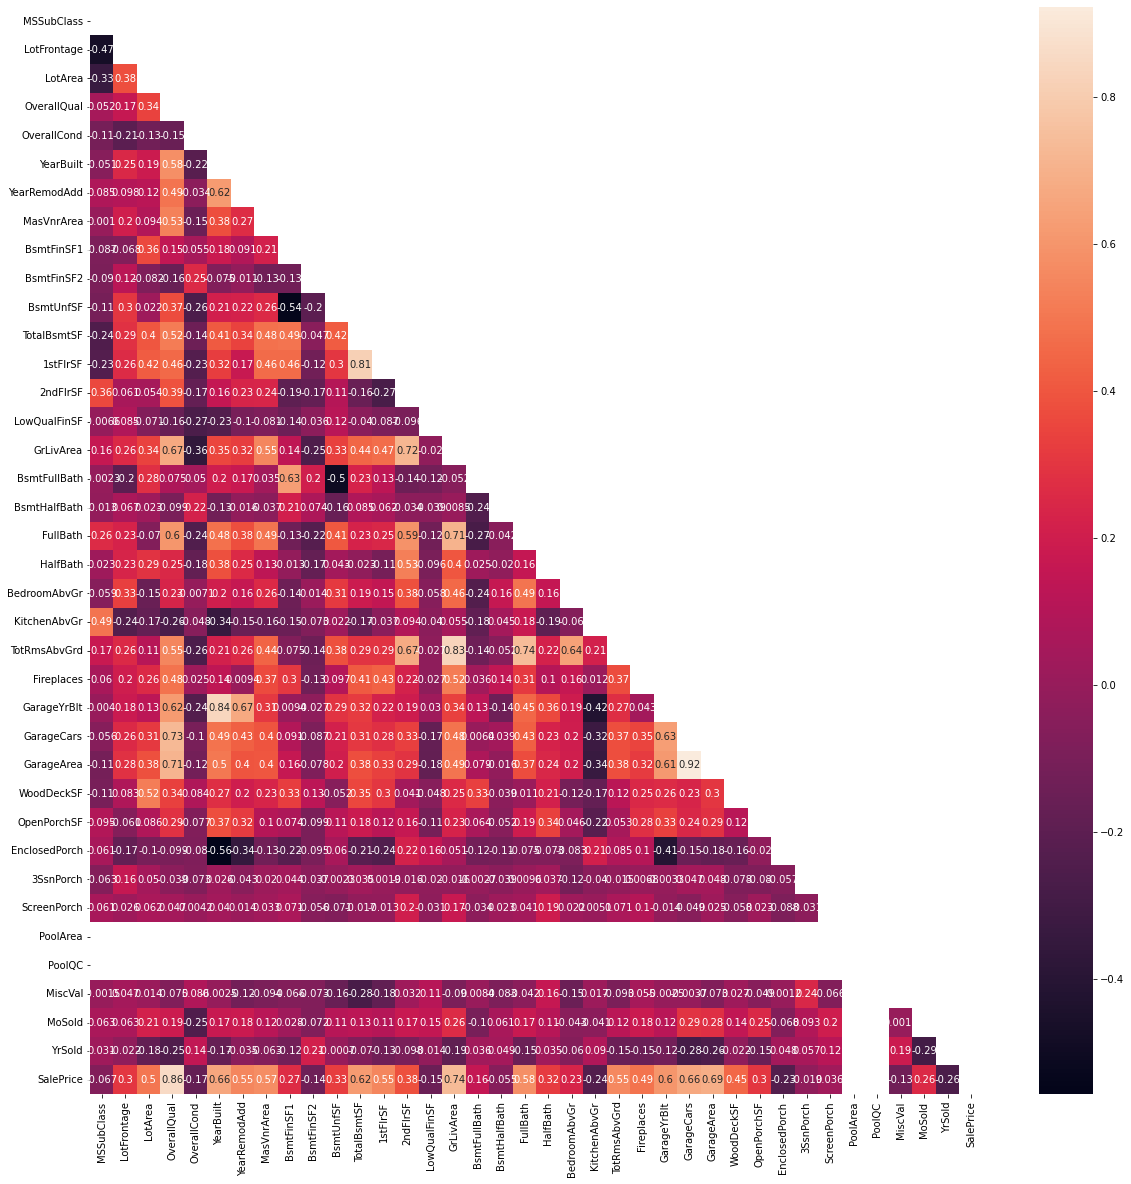

In [10]:
corr = df_train.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype = bool))
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask)

Lets find out what are the top ten strongly correlated feature with `SalePrice`.

In [11]:
top_features = corr['SalePrice'].sort_values(ascending=False)[0:11].index
print(top_features)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd'],
      dtype='object')


The top ten features that are strongly correlated to **SalePrice** are 

01. OverallQual
02. GrLivArea
03. GarageArea
04. GarageCars
05. YearBuilt
06. TotalBsmtSF
07. GarageYrBlt 
08. FullBath
09. MasVnrArea
10. TotRmsAbvGrd

We are going to use only these features in our Linear Regression model for predictions. So, lets proceed dropping all the the other from both of the datasets.

In [12]:
df_train = df_train[top_features]
print(df_train.head(10))

df_test = df_test[top_features]
print(df_test.head(10))

    SalePrice  OverallQual  GrLivArea  GarageArea  GarageCars  YearBuilt  \
Id                                                                         
1      208500            7       1710         548           2       2003   
2      181500            6       1262         460           2       1976   
3      223500            7       1786         608           2       2001   
4      140000            7       1717         642           3       1915   
5      250000            8       2198         836           3       2000   
6      143000            5       1362         480           2       1993   
7      307000            8       1694         636           2       2004   
8      200000            7       2090         484           2       1973   
9      129900            7       1774         468           2       1931   
10     118000            5       1077         205           1       1939   

    TotalBsmtSF  GarageYrBlt  FullBath  MasVnrArea  TotRmsAbvGrd  
Id                  

Since `GarageYrBlt` is one of the feature we are going to use for predictions and have missing values. Lets fill them with the previous or next value in both datasets. 

In [13]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(method = 'ffill').fillna(method = 'bfill')


missing_values_in_the_training_data = df_train.isnull().sum().sort_values(ascending = False)

print(missing_values_in_the_training_data)

# print(df_train.info())
# print(df_test.info())

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
GarageCars      0
YearBuilt       0
TotalBsmtSF     0
GarageYrBlt     0
FullBath        0
MasVnrArea      0
TotRmsAbvGrd    0
dtype: int64


In [14]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(method = 'ffill').fillna(method = 'bfill')
missing_values_in_the_test_data = df_test.isnull().sum().sort_values(ascending = False)
print(missing_values_in_the_test_data)

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
GarageCars      0
YearBuilt       0
TotalBsmtSF     0
GarageYrBlt     0
FullBath        0
MasVnrArea      0
TotRmsAbvGrd    0
dtype: int64


We no more have any missing records in both datasets.

In [15]:
df_train.describe()

,SalePrice,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,173820.660000,5.980000,1449.470000,466.370000,1.750000,1971.410000,1047.260000,1977.170000,1.520000,121.640000,6.270000
std,72236.552886,1.530696,470.657105,199.121082,0.757121,29.373284,408.500303,27.227087,0.594249,213.553982,1.420307
min,40000.000000,3.000000,520.000000,0.000000,0.000000,1910.000000,0.000000,1900.000000,0.000000,0.000000,4.000000
25%,129362.500000,5.000000,1083.750000,352.000000,1.000000,1954.750000,822.000000,1959.750000,1.000000,0.000000,5.000000
50%,153750.000000,6.000000,1349.500000,480.000000,2.000000,1970.000000,1034.500000,1979.000000,1.000000,0.000000,6.000000
75%,207750.000000,7.000000,1717.250000,576.000000,2.000000,2000.250000,1268.500000,2003.000000,2.000000,188.500000,7.000000
max,438780.000000,10.000000,2945.000000,894.000000,3.000000,2009.000000,2223.000000,2009.000000,3.000000,1115.000000,11.000000


Next, we are going to visualize the correlation of the top correlated features with the `SalePrice` using pairplots. This way, we can get better idea about these features and their relationship with `SalePrice` and with eachother. 

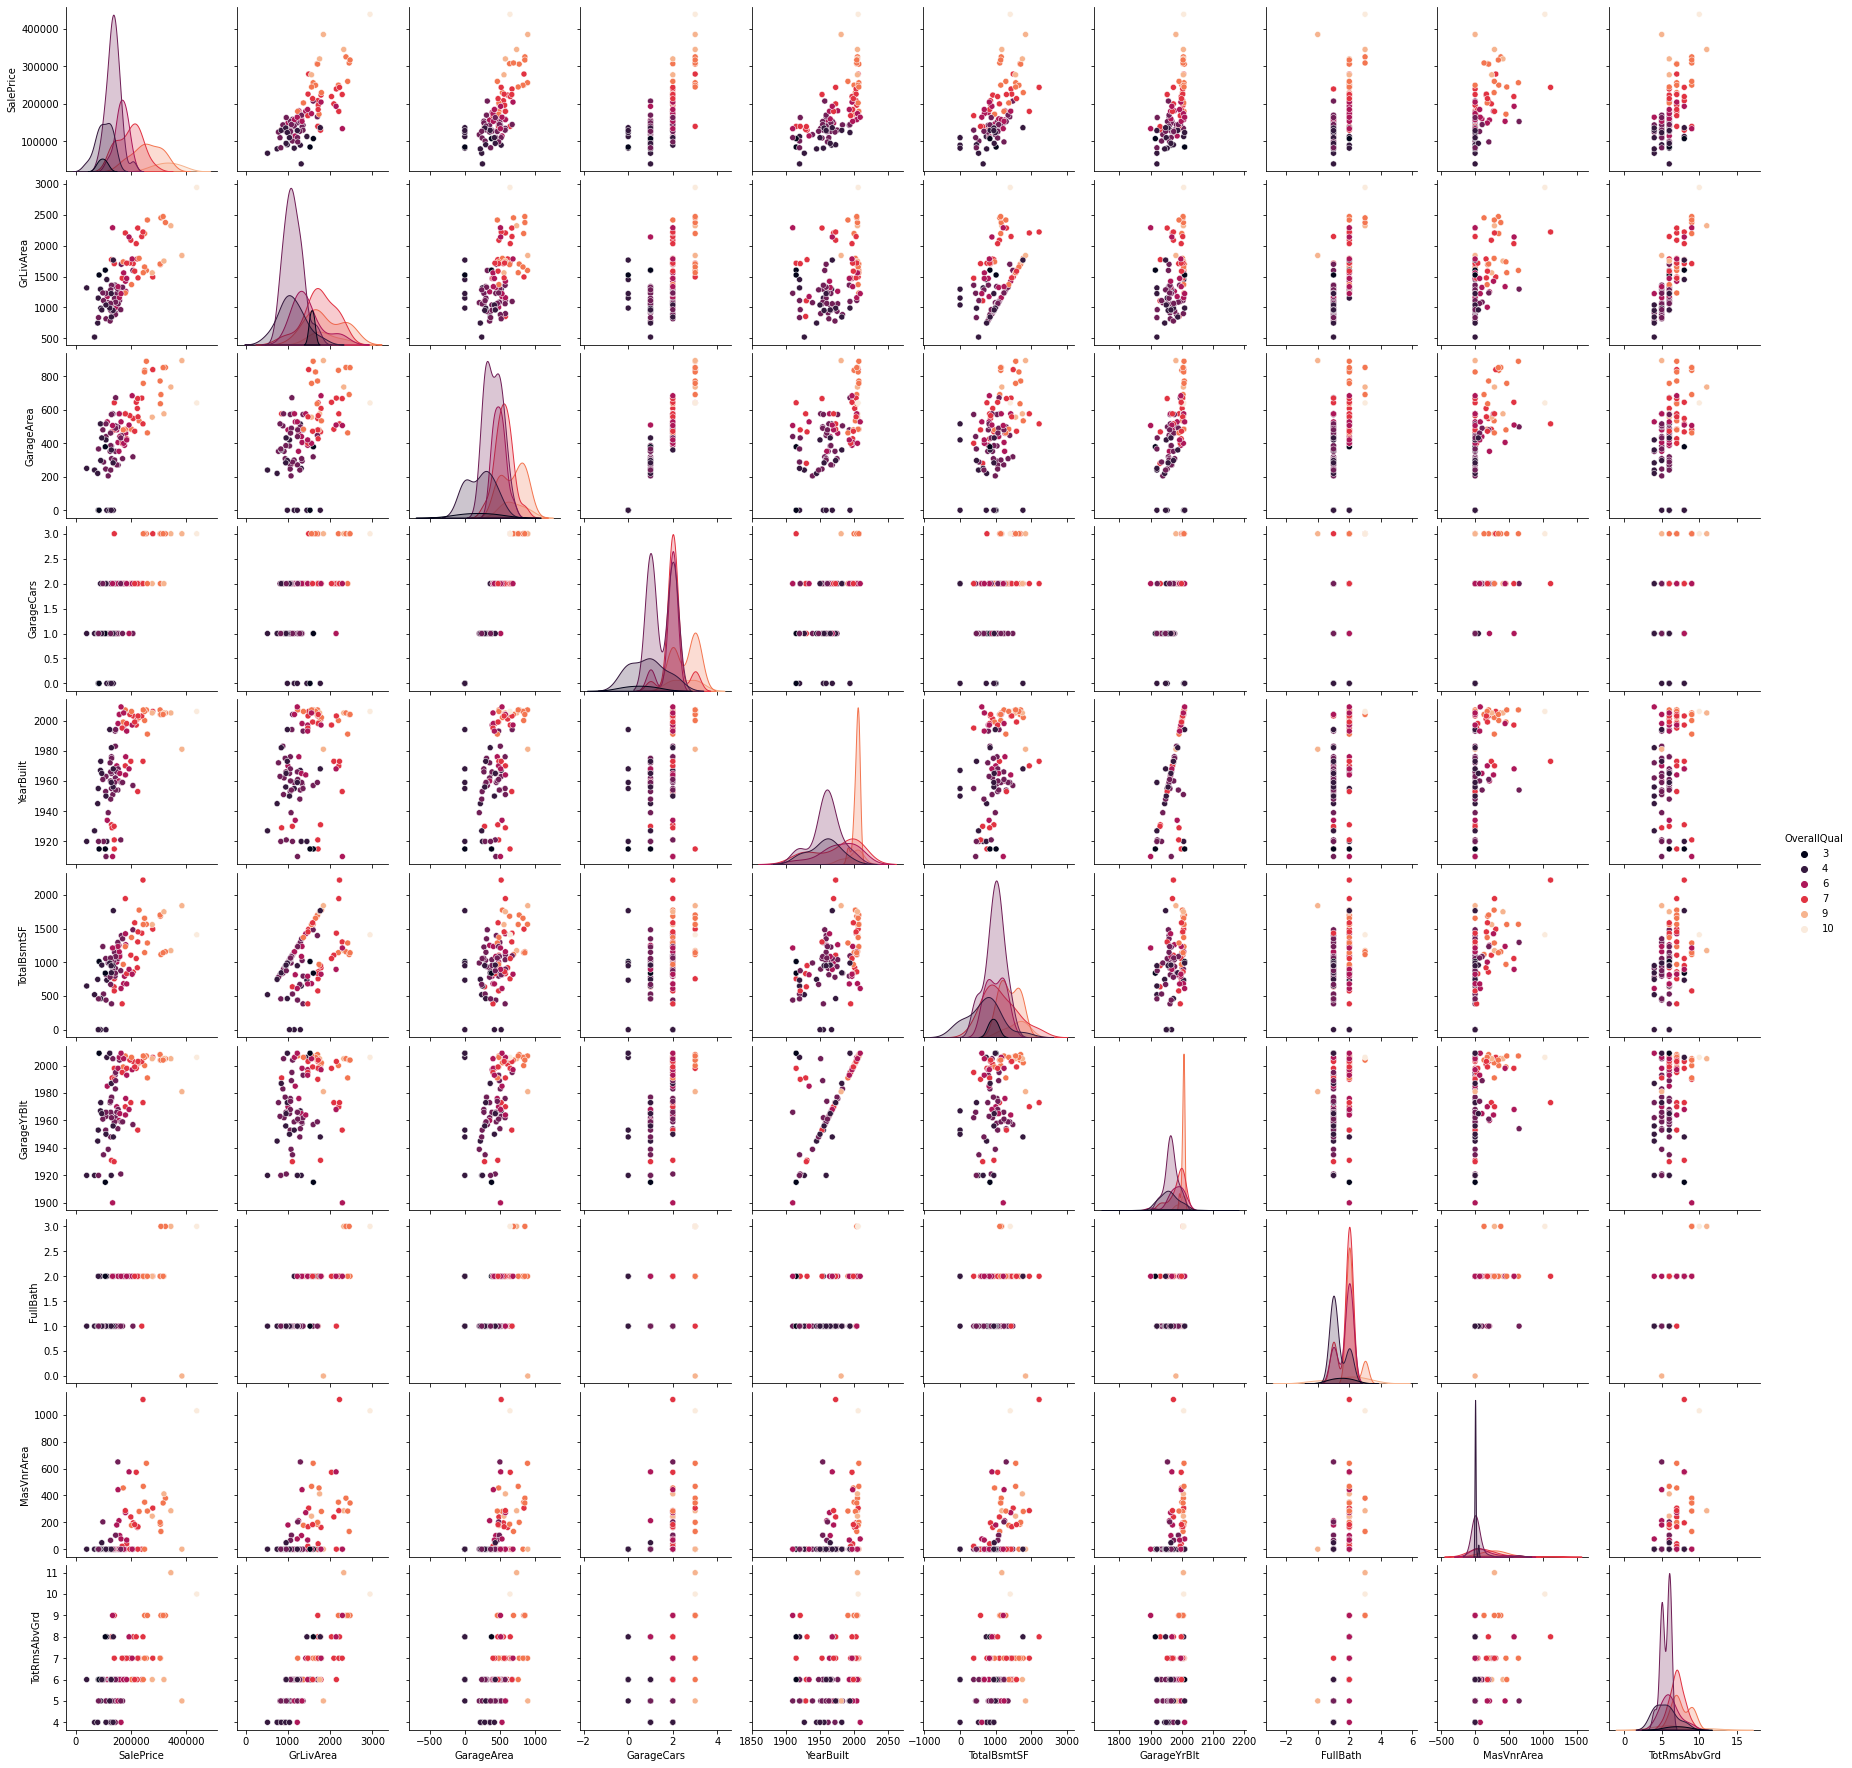

In [16]:

sns.pairplot(df_train, hue = 'OverallQual' ,diag_kind = 'kde',kind = 'scatter', palette = 'rocket')


Lets also plot the heatmap for these features.


<AxesSubplot:>

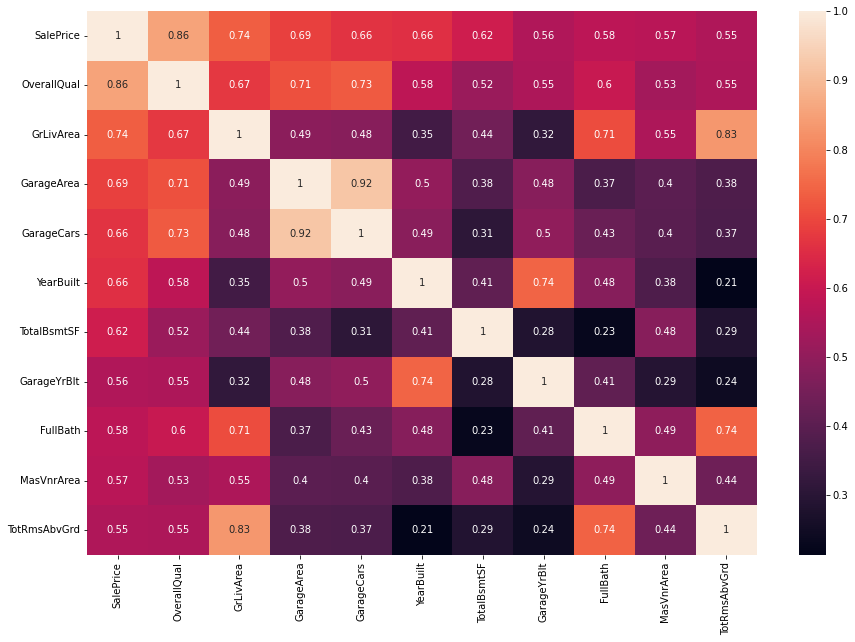

In [17]:
corr = df_train.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(15, 10))
#
# Generate a mask for upper traingle
#
# mask = np.triu(np.ones_like(corr, dtype = bool))
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True)


[Back to top](#Index)

## 3. Project Description

<!-- In the module, Dr. Wiiliams used five independent vairables namely `OverallQual`, `GrLivArea`, `GarageArea`, `GarageCars`, `YearBuilt` to train and test his model. 

As an improvement upon the analysis by Dr. Williams, in this project we are going to chose the top ten strongly correlated variables with `SalePrice`. We'll start analysing our model's perfromance with a single variable(i.e, simple linear regression model). We'll keep adding more variables one by one in our analysis unless we exhuast the list of ten selected variables. Based on the $R^2$ scores we'll choose the number of independent variables with wich the linear regression models performs best and will apply this model on our test data.         -->



[Back to top](#Index)

### 3.1 Linear Regression
Linear regression models assume that the relationship between a dependent continuous variable $Y$ and one or more explanatory (independent) variables $X$ is linear (that is, a straight line). It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). Linear regression models can be divided into two main types:

![](https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg)

**Source: MyBookSucks**

### Simple Linear Regression

Simple linear regression uses a traditional slope-intercept form, where $a$ and $b$ are the coefficients that we try to “learn” and produce the most accurate predictions. $X$ represents our input data and $Y$ is our prediction.

$$Y = bX + a$$
$$b = \frac{ n (\sum {x y}) - (\sum x) (\sum y) }{n (\sum x^2) -(\sum x )^2}$$
$$a = \frac { (\sum y) (\sum x^2)  - (\sum x)( \sum x y)}{n (\sum x^2) - (\sum x)^2}$$

![](https://spss-tutorials.com/img/simple-linear-regression-equation-linear-relation.png)

**Source: SPSS tutorials**

### Multivariable Regression

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

$$ Y(x_1,x_2,x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0$$

Where $w_0$ is y-intercept, $ w_i$ represents the slope coefficient of each independent variable $\forall i !=0$. 

The variables $x_1, x_2, x_3$ represent the attributes, or distinct pieces of information, we have about each observation.

[Back to top](#Index)

### 3.2 Analysis 

We are going to anlyze our model's performance by implement both simple and multiple linear regression. As stated before, we'll analyze the model's performance on the training data first and then we'll apply it on the test data.

In this part of the project we'll heavily using python's `sklearn` package.





In [18]:

variables_array = variables_array = list(range(1,11))
keys = variables_array
r_square_scores = {}

def calc_linear_regression(df, num_of_independent_variables):
    df_train = df.iloc[:, 0:num_of_independent_variables+1]
    Y_train = df_train.pop('SalePrice')
    X_train = df_train

    reg = LinearRegression()

    model = reg.fit(X_train, Y_train)

    predictions = model.predict(X_train)

    model_score = model.score(X_train, Y_train)
    
    return model_score, predictions

for index in range(0,len(variables_array)):
    [score, predictions] = calc_linear_regression(df_train, variables_array[index])
    r_square_scores[keys[index]] = score

print(r_square_scores)




{1: 0.7311285907202643, 2: 0.7776370735872411, 3: 0.789158151143107, 4: 0.7916699059969976, 5: 0.8309859964337734, 6: 0.8489694682378787, 7: 0.8489800578822937, 8: 0.8506039694875507, 9: 0.851216890403442, 10: 0.8515784074419748}


[Back to top](#Index)

### 3.3 Results
As shown below that the model's prediction score saturates approximately at 0.85 with six independant variable. The reason is, some of the these ten variable are strong correleted to each other. That is why they are not impacting imporving the model score significantly. 

For example, it can be found in the pariplot in the section for [Correlation](#2.4-Correlation) that the `YearBuilt` and `GarageBuilt` are strongly correlated so we can drop one of them.  Similary, `GRLivArea` and `TotalBsmtSF` have strong correlation between them, so using both of them for predictions won't impact much the prediction accuracy of our linear regression model. 

Therefor, we are going to apply our linear regression model with six independent variables on our test data. 

As mentioned before, we have used $R^2$ as a metric for the performance evaluation of our model. It is called coefficient of determinition and mathematically it can be written as follows

$$R^2 =1- \frac{\sum (y_i - \hat{y}_i)^2}{{\sum (y_i - \bar{y})^2}}$$

Where $\hat {y}_i$ is the predicted value and $\bar{y}$ is mean of the observed data.

<!-- $$R^2 = formula$$ -->




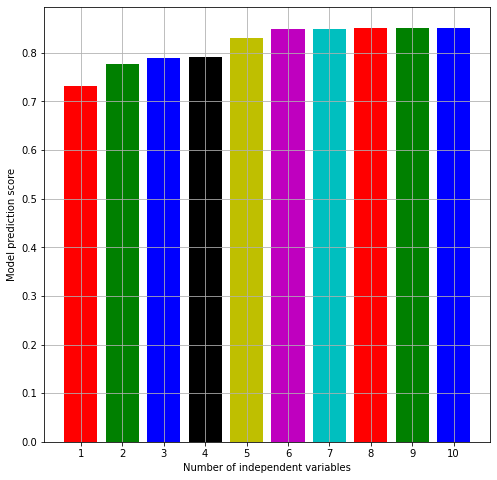

In [19]:
my_colors = ['r','g', 'b', 'k', 'y', 'm', 'c'] 
fig, ax = plt.subplots(figsize=(8,8))

plt.bar(range(len(r_square_scores)), list(r_square_scores.values()), align='center', color = my_colors)
plt.xticks(range(len(r_square_scores)), list(r_square_scores.keys()))
plt.xlabel('Number of independent variables')
plt.ylabel('Model prediction score')
ax.set_facecolor('white')
plt.grid(visible = 'None')

[Back to top](#Index)

### 3.4 Verify Your Model Against Test 

It's time to apply our model on the test data and lets measure its performance in terms of $R^2$

In [20]:
[r_square_score, predictions] = calc_linear_regression(df_test, 6)
print(r_square_score)

0.8076194739067672


<!-- Although the model has performed slightly poor on the test data but in terms of $R^2$ the model perfromance on predicting the house prices with 0.80 scores is far better than the one Dr. William has implemented in the module with 0.73 score. 

The reason this model is predicitng with a higher accuracy is that it takes more features as in input when predicting a house's prices. -->

Our model has predicted the house prices with 0.80 $R^2$ score.
Also, look below at the histrogram of residuals. It approximates the normal distribution which means that our regression model does explain all trends in the test dataset.

Text(0.5, 0, 'Predictions')

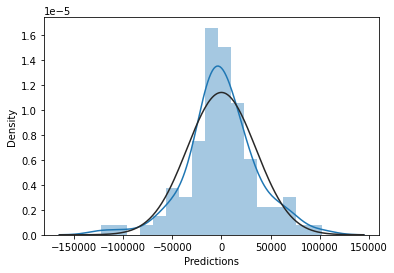

In [21]:
SalePrice = df_test.SalePrice
sns.distplot(SalePrice-predictions, fit=norm)
plt.xlabel('Predictions')

Lets also plot the scatter plot for predictions. 


Text(0, 0.5, 'Sale Price')

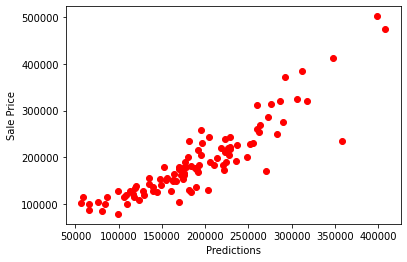

In [22]:
plt.scatter(predictions, SalePrice, color = 'red')
plt.xlabel('Predictions')
plt.ylabel('Sale Price')

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?



We have explored the performance of our linear regression model with multiple sets of parameters and it works best with six independent variables when predicting the house prices with a 0.80 R-Squared score which means that our model has explained well all the variations in the data. 


Personally, this module was a great learning experience overall. This is the first machine learning model that I have ever built. The key data analysis techniques that I have practiced are data wrangling, and data preparation, implementing a machine learning model and last but not least the performance evalutions of a machine learning model.


[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
<!-- - Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range. -->
- David, Chen, "House price prediction with linear regression" www.kaggle.com
- Venelin Valkov, "Predicting House Prices with Linear Regression | Machine Learning from Scratch (Part II)", www.medium.com
- Ashis, "Housing Price Prediction ( Linear Regression )", www.kaggle.com
- "Least Squares Regression Line: Ordinary and Partial" www.statisticshowto.com
- Alex Crhis, "Why do the residuals need to be normal when carrying out multi level modeling?", www.researchgate.com
<!-- - Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18. -->

<!-- Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com . -->
